In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [4]:
session_keys = experiment.Session.fetch('KEY')

In [5]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

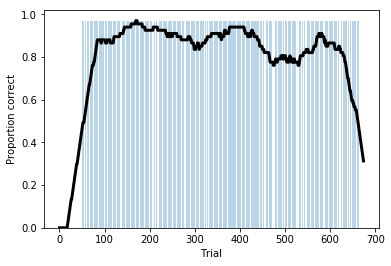

In [6]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [ ]:
photostims = experiment.Photostim * experiment.BrainLocation

In [ ]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking with spiking overlay

In [11]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [16]:
unit_key = units[6]

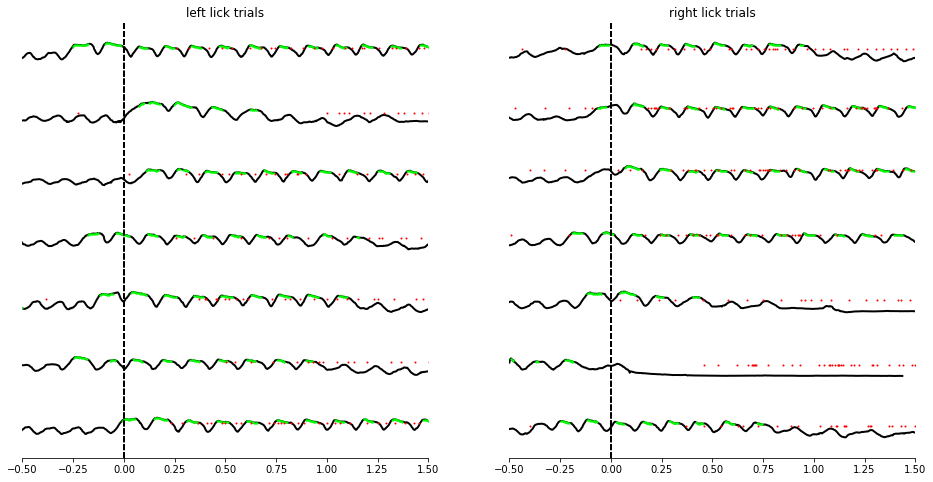

In [17]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=7)

In [ ]:
ephys.TrialSpikes()

In [ ]:
experiment.SessionTrial * ephys.Unit

In [ ]:
trk = (tracking.Tracking.JawTracking * tracking.Tracking.TongueTracking
       * experiment.BehaviorTrial & session_key & experiment.ActionEvent)
tracking_fs = float((tracking.TrackingDevice & tracking.Tracking & session_key).fetch1('sampling_rate'))

l_trial_trk = trk & 'trial_instruction="left"' & 'early_lick="no early"'
r_trial_trk = trk & 'trial_instruction="right"' & 'early_lick="no early"'

In [ ]:
trs = r_trial_trk.fetch(as_dict=True, limit=20)

In [ ]:
tr = trs[3]

In [ ]:
tr

In [ ]:
(ephys.TrialSpikes & r_trial_trk)

======================================================================================

In [ ]:
importlib.reload(behavior_plot)